In [3]:
import numpy as npp
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import sys
#this css file can be downloaded from [David's repo](https://github.com/ketch/PseudoSpectralPython/blob/master/custom.css)
#Then set the address of css file as per your address of file
#Following two commands are not needed for calculations.
css_file = '/Users/rajvanmp/Downloads/custom.css'

#HTML(open(css_file, "r").read())

In [4]:
#Import the needed classes.
#GPE_Scalar_Field is the class for representing the GP-like fields(as defined in repo home)
sys.path.append('/Users/rajvanmp/station_X/pyGP_fields')
from GPE import GPE_scalar_field

#ImEx is just a class for holding no. of stages and Butcher Tableau for ImEx methods
from GPE import ImEx

In [5]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
font = {'size'   : 15}
matplotlib.rc('font', **font)

fft = np.fft.fft
ifft = np.fft.ifft


bta = -8.0
a= bta*bta/16.0
c = 0.5
xo = -2.5

def exact_soln(t,x):
    omg = np.sqrt(a)*((x-xo)-c*t)
    #print("omg shape",omg.shape)
    f = (2.0*a/bta)/np.cosh(omg)
    thta = 0.5*c*(x-xo) - (0.25*c*c -a)*t
    
    sol = f*np.cos(thta)+1j*f*np.sin(thta)
    
    return(sol)

def plot_solution(frames, uuhat, x, tt, xi):
    fig = plt.figure(figsize=(12,8))
    axes = fig.add_subplot(211)
    axes2 = fig.add_subplot(212)
    line, = axes.plot(x,np.square(np.abs(frames[0])),lw=3)
    sol = np.square(np.abs(exact_soln(0.0,x)))
    line2, = axes2.plot(x,sol,lw=3)
    xi_max = np.max(np.abs(xi))
    #axes2.semilogy([xi_max/2.,xi_max/2.],[1.e-6,4e8],'--r')
    #axes2.semilogy([-xi_max/2.,-xi_max/2.],[1.e-8,4e10],'--r')
    axes.set_xlabel(r'$x$',fontsize=30)
    axes2.set_xlabel(r'$\xi$',fontsize=30)
    plt.tight_layout()
    plt.close()

    def plot_frame(i):
        line.set_data(x,np.square(np.abs(frames[i])))
        sol = np.square(np.abs(exact_soln(tt[i],x)))
        line2.set_data(x,sol)
        #line.set_data(x,sol)
        #line.set_data(x,s)
        #power_spectrum = np.abs(uuhat[i])**2
        #line2.set_data(np.sort(xi),power_spectrum[np.argsort(xi)])
        axes.set_title('t= %.2e' % tt[i])
        #axes.set_xlim((-20,20))
        #axes.set_ylim((-2,2))

    anim = matplotlib.animation.FuncAnimation(fig, plot_frame,
                                              frames=len(frames), interval=100,
                                              repeat=False)
    return HTML(anim.to_jshtml())

\begin{equation}
\frac{\partial \psi}{\partial t} = rhs\_f + im\_rhs
\end{equation}
i.e. all the contributions for explicit method are given by rhs_f in following code while im_rhs calculates implicitly treated term's contribution. For example in KdV case:
\begin{equation}
im\_rhs = i u_{xx}
\end{equation}
\begin{equation}
rhs\_f = -i \beta |u|^2u
\end{equation}

In [10]:
#Example NLS 1d
'''
# Higueras (17)
A    = np.array([[0,0,0],[5/6.,0,0],[11/24,11/24,0]])
Ahat = np.array([[2./11,0,0],[205/462.,2./11,0],[2033/4620,21/110,2/11]])
b = np.array([24/55.,1./5,4./11])
bhat = b

imx = ImEx(3,Ahat,A,bhat,b)

#4A42
ex_A = np.array([[0.0,0.0,0.0,0.0,0.0,0.0],[0.5,0.0,0.0,0.0,0.0,0.0],[0.25,0.25,0.0,0.0,0.0,0.0],[0.0,-1.0,2.0,0.0,0.0,0.0],[1.0/6.0,0.0,2.0/3.0,1.0/6.0,0.0,0.0],[1.0/6.0,0.0,2.0/3.0,1.0/6.0,0.0,0.0]])
im_A = np.array([[0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.5,0.0,0.0,0.0,0.0],[0.25,-0.25,0.5,0.0,0.0,0.0],[0.0,1.0,0.0,0.0,0.0,0.0],[1.0/6.0,0.0,2.0/3.0,-4.0/3.0,1.5,0.0],[1.0/6.0,0.0,2.0/3.0,1.0/6.0,-2.0,2.0]])
ex_b = np.array([1.0/6.0,0.0,2.0/3.0,1.0/6.0,0.0,0.0])
im_b = np.array([1.0/6.0,0.0,2.0/3.0,1.0/6.0,-2.0,2.0])


imx = ImEx(6,im_A,ex_A,im_b,ex_b)
'''

imA = np.array([[0.0,0.0,0.0,0.0,0.0,0.0],
[0.25,0.25,0.0,0.0,0.0,0.0],
[8611.0/62500.0,-1743.0/31250,0.25,0.0,0.0,0.0],
[5012029.0/34652500.0,-654441.0/2922500.0,174375.0/388108.0,0.25,0.0,0.0],
[15267082809.0/155376265600.0,-71443401.0/120774400.0, 730878875.0/902184768.0, 2285395.0/8070912.0,0.25,0.0],
[82889.0/524892.0, 0.0, 15625.0/83664.0, 69875.0/102672.0, -2260.0/8211.0, 0.25]])

exA = np.array([[0.0,0.0,0.0,0.0,0.0,0.0],
[0.5,0.0,0.0,0.0,0.0,0.0],
[13861.0/62500,  6889.0/62500.0,0.0,0.0,0.0,0.0],
[-116923316275.0/2393684061468.0, -2731218467317.0/15368042101831.0, 9408046702089.0/11113171139209.0, 0.0,0.0,0.0],
[-451086348788.0/2902428689909.0, -2682348792572.0/7519795681897.0, 12662868775082.0/11960479115383.0,3355817975965.0/11060851509271.0,0.0,0.0],
[647845179188.0/3216320057751.0,73281519250.0/8382639484533.0, 552539513391.0/3454668386233.0, 3354512671639.0/8306763924573.0,4040.0/17871.0,0.0]])

imb = np.array([82889.0/524892.0, 0.0, 15625.0/83664.0, 69875.0/102672.0,-2260.0/8211.0,0.25])
exb = np.array([82889.0/524892.0, 0.0, 15625.0/83664.0, 69875.0/102672.0,-2260.0/8211.0,0.25])

imC = np.array([0.0,0.5,83.0/250.0,31.0/50.0, 17.0/20.0,1.0])
exC = np.array([0.0,0.5,83.0/250.0,31.0/50.0, 17.0/20.0,1.0])


imx = ImEx(6,imA,exA,imb,exb)


###   PARAMETERS

bta = -8.0
a= bta*bta/16.0
c = 0.5
xo = -2.5

def exact_soln(t,x):
    omg = np.sqrt(a)*((x-xo)-c*t)
    #print("omg shape",omg.shape)
    f = (2.0*a/bta)/np.cosh(omg)
    thta = 0.5*c*(x-xo) - (0.25*c*c -a)*t
    
    sol = f*np.cos(thta)+1j*f*np.sin(thta)
    
    return(sol)
    

#Defining right hand side for the PDE, which contains everything EXCEPT laplacian term. If you are using filtering..
#..filtr should be passed here as an argument as shown

def rhs_f(u, xi, filtr):
    # Evaluate only the non-stiff nonlinear term
    u2 = np.square(np.abs(u))
    return -1j*bta*u2*u

#Please note that following function doesn't use filtr at all, but for the convenience of supporting...
#..functions with varying length of arguement list, we just pass same argument list (after 1st argument) to..
#..both im_rhs and rhs_f
#So, the format is: we pass (sub_stage_no,arg_list) to class method ::update_K(sub_stage_no,arg_method) which...
#..then passes (psi_k,arg_list) to rhs_f(psi_k,arg_list) and (ft_psi_k,arg_list) to im_rhs(ft_psi_k,arg_list)..
#..where psi_k is temporary sub-stage solution while ft_psi_k is Fourier Transform of same.

def im_rhs(psi_ft,xi,filtr):
    psi_ft = -psi_ft*(xi**2)
    return(1j*np.fft.ifft(psi_ft))


def solve_NLS_1d(m,dt,use_filter=False):
    max_err=-1.0
    L = 20.0
    x = np.arange(-m/2,m/2)*(L/m)
    xi = np.fft.fftfreq(m)*m*2*np.pi/L

    tmax = 5.0

    num_plots = 50
    nplt = np.floor((tmax/num_plots)/dt)
    nmax = int(round(tmax/dt))
    
    uin = exact_soln(0.0,x)
    mass_ini = np.sum(np.square(np.abs(uin)))

    
    frames = [uin.copy()]
    tt = [0]
   

    filtr = np.ones_like(xi)
    
    err_list=[]
    real_err_list=[]
    mass_err_list=[]
    
    #Define psi as an instance of class GPE_scalar_field
    #1st argument sets the space-dim of problem. In this 
    #case of 1-d problem, it is 1. Next argument(m here)
    #gives no. of points in space, then we pass im_rhs
    #and rhs_f functions followed by ImEx object. Last 
    #argument passes a scalar array uin which is initial
    #condition at t=0. Note that it as passed as a complex array
    
    psi = GPE_scalar_field(1,m,im_rhs,rhs_f,imx,uin)
    lmbda = xi**2
    
    if use_filter:
        xi_max = np.max(np.abs(xi))
        filtr[np.where(np.abs(xi)>xi_max*2./3)] = 0.
        
    for n in range(1,nmax+1):
        #for each stage
        for k in range(imx.s):
            
            #update summation for input to FFT for calc. implicit contribution
            psi.update_stage_sum(k,dt)
            
            #Do fft,mulitply by needed functions and do inverse fft
            psi.do_fft(k,lmbda,dt)
            
            #update im_K and ex_K i.e. stage contributions
            psi.update_K(k,xi,filtr)
            
        #Sum over stage contributions
        psi.sum_contributions(dt)
        
        
        t = n*dt
        
        if np.mod(n,nplt) == 0:
            
            exc_sol = exact_soln(t,x)
            real_err = np.sum(np.abs(exc_sol.real-psi.psi.real))/np.sum(np.abs(exc_sol.real))
            err2 = np.square(np.abs(exc_sol-psi.psi)).flatten()
            sol2 = np.square(np.abs(exc_sol)).flatten()
            err2_norm = np.sqrt(np.sum(err2))
            sol2_norm = np.sqrt(np.sum(sol2))
            err = err2_norm/sol2_norm
            
                
            mass = np.sum(np.square(np.abs(psi.psi)))
            mass_err = np.abs(mass-mass_ini)/mass_ini
            
            #print("time ",t/tmax,"mass",mass)
            
            frames.append(psi.psi)
            tt.append(t)
            
            err_list.append(err)
            real_err_list.append(real_err)
            mass_err_list.append(mass_err)


       
    return frames,tt, np.array(err_list),np.array(real_err_list),np.array(mass_err_list)

In [13]:
m = 512
umax = 3000
dt = 0.1
use_filter=False
err_list = []
err_real_list = []
mass_err_list = []
dt_list = []
dt = 0.001
frames,tt,err,real_err,mass_err = solve_NLS_1d(m,dt,use_filter)
  

 

class shapes (512,) (6, 512)
(512,) (512,)


In [14]:
L = 20.0
x = np.arange(-m/2,m/2)*(L/m)
xi = np.fft.fftfreq(m)*m*2*np.pi/L
plot_solution(frames, None, x, tt, xi)

(-1.8274106292346172e-35+3.8039986944266235e-35j)

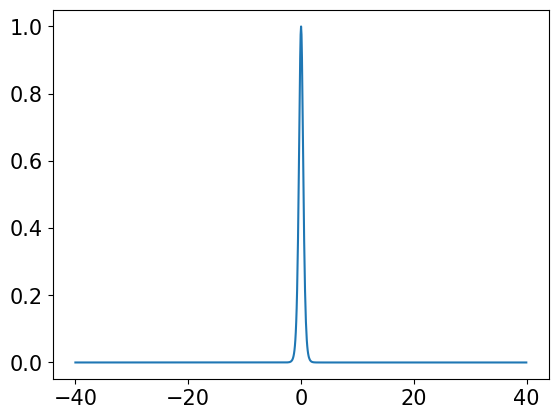

In [21]:
y = exact_soln(5.0,x)
y2 = np.square(np.abs(y))
plt.plot(x,y2)
y[-1]

In [18]:
fr = np.array(frames)

In [19]:
fr.shape

(51, 1024)

In [20]:
fr[-1,0],fr[-1,-1]

((1.016583962483483e-09+1.4676991488348693e-09j),
 (-2.790865222626873e-09+8.418444226924422e-10j))